# Question 2

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
for col in ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']:
    encoder=LabelEncoder()
    df[col]=encoder.fit_transform(df[col])
    
# Encoded dataset
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [11]:
# standardization of data
data=df.to_numpy()
data

array([[13300000,     7420,        4, ...,        2,        1,        0],
       [12250000,     8960,        4, ...,        3,        0,        0],
       [12250000,     9960,        3, ...,        2,        1,        1],
       ...,
       [ 1750000,     3620,        2, ...,        0,        0,        2],
       [ 1750000,     2910,        3, ...,        0,        0,        0],
       [ 1750000,     3850,        3, ...,        0,        0,        2]],
      dtype=int64)

In [12]:
#mean
xmean=data.mean(axis=0)
xmean

array([4.76672925e+06, 5.15054128e+03, 2.96513761e+00, 1.28623853e+00,
       1.80550459e+00, 8.58715596e-01, 1.77981651e-01, 3.50458716e-01,
       4.58715596e-02, 3.15596330e-01, 6.93577982e-01, 2.34862385e-01,
       1.06972477e+00])

In [13]:
# stdev
stdev=np.std(data,axis=0,ddof=1)
stdev

array([1.87043962e+06, 2.17014102e+03, 7.38063861e-01, 5.02469616e-01,
       8.67492463e-01, 3.48634682e-01, 3.82848697e-01, 4.77551940e-01,
       2.09398697e-01, 4.65179897e-01, 8.61585750e-01, 4.24302227e-01,
       7.61372670e-01])

In [14]:
# standardized data
s_data=(data-xmean)/stdev
s_data

array([[ 4.56217388,  1.04576555,  1.40213123, ...,  1.51629947,
         1.80328447, -1.40499497],
       [ 4.00080852,  1.75539685,  1.40213123, ...,  2.67695005,
        -0.55352617, -1.40499497],
       [ 4.00080852,  2.2161964 ,  0.04723492, ...,  1.51629947,
         1.80328447, -0.09157772],
       ...,
       [-1.61284504, -0.70527273, -1.30766139, ..., -0.80500169,
        -0.55352617,  1.22183953],
       [-1.61284504, -1.03244041,  0.04723492, ..., -0.80500169,
        -0.55352617, -1.40499497],
       [-1.61284504, -0.59928883,  0.04723492, ..., -0.80500169,
        -0.55352617,  1.22183953]])

### PCA

In [23]:
# split data
target=s_data[:,0]
pred=s_data[:,1:]

In [24]:
# covariance matrix
cov_mat=np.cov(pred,rowvar=False)
cov_mat

array([[ 1.        ,  0.15185849,  0.19381953,  0.08399605,  0.28887411,
         0.14029659,  0.04741699, -0.00922924,  0.2223931 ,  0.35298048,
         0.2347788 , -0.17144536],
       [ 0.15185849,  1.        ,  0.37393024,  0.40856424, -0.01203324,
         0.0805487 ,  0.09731242,  0.04604889,  0.16060326,  0.1392699 ,
         0.07902306, -0.123244  ],
       [ 0.19381953,  0.37393024,  1.        ,  0.32616471,  0.04239762,
         0.12646884,  0.10210571,  0.0671591 ,  0.18691503,  0.17749582,
         0.06347174, -0.1435595 ],
       [ 0.08399605,  0.40856424,  0.32616471,  1.        ,  0.12170613,
         0.04353767, -0.17239362,  0.01884651,  0.293602  ,  0.04554709,
         0.04442487, -0.10467233],
       [ 0.28887411, -0.01203324,  0.04239762,  0.12170613,  1.        ,
         0.09233692,  0.04400208, -0.01178149,  0.105423  ,  0.20443255,
         0.19987578, -0.15672586],
       [ 0.14029659,  0.0805487 ,  0.12646884,  0.04353767,  0.09233692,
         1.        ,  

In [25]:
# Finding eigenvalues and eigenvectors
eigen_values,eigen_vectors=np.linalg.eigh(cov_mat)

In [26]:
eigen_values

array([0.4150922 , 0.5732991 , 0.62692857, 0.64543374, 0.73918685,
       0.80847788, 0.87773106, 0.89466093, 1.13219458, 1.27808492,
       1.53417839, 2.47473176])

In [27]:
# Sorting eigenvalues
sorted_index=np.argsort(eigen_values)[::-1]
sorted_index

array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0], dtype=int64)

In [28]:
sorted_eigenvectors=eigen_vectors[:,sorted_index]
sorted_eigenvectors

array([[-0.3788185 ,  0.14404135,  0.3544585 ,  0.05510497,  0.00860643,
        -0.30473322,  0.07185094, -0.0190302 ,  0.58421744,  0.09145247,
         0.43534343, -0.26346283],
       [-0.34268654, -0.35077096, -0.29362951,  0.07896104,  0.11346793,
        -0.16671842, -0.2761012 ,  0.14269835, -0.1390275 ,  0.48940157,
         0.31456814,  0.41474351],
       [-0.36386782, -0.2726582 , -0.23665735,  0.15125748, -0.02097506,
        -0.19065292, -0.05318182,  0.24961705,  0.15648307, -0.74279292,
        -0.14710245,  0.12074485],
       [-0.30844143, -0.49977936, -0.06147836, -0.18352413,  0.25598386,
         0.25205687,  0.12872038,  0.01272127, -0.05317085,  0.17104498,
        -0.22183526, -0.62493056],
       [-0.25966447,  0.20667962,  0.43091903, -0.02858147,  0.36867193,
         0.33293865,  0.23082512,  0.45258027, -0.33586344, -0.12239226,
         0.16734244,  0.20660568],
       [-0.24561969,  0.34608808, -0.41617578, -0.05226092, -0.04780629,
         0.11654046,  

In [29]:
100*eigen_values[0]/sum(eigen_values)  #% of variance explained by first eigenvalue

3.459101697823033

In [30]:
# choosing number of dimensions
n_component=1
eigenvector_subset=sorted_eigenvectors[:,0:n_component]
eigenvector_subset

array([[-0.3788185 ],
       [-0.34268654],
       [-0.36386782],
       [-0.30844143],
       [-0.25966447],
       [-0.24561969],
       [-0.17670671],
       [-0.00624684],
       [-0.33150076],
       [-0.31075391],
       [-0.25891112],
       [ 0.28109057]])

In [32]:
# Transform the data
transformed_data=np.matmul(pred,eigenvector_subset)
transformed_data

array([[-3.49897203e+00],
       [-5.32213860e+00],
       [-2.41070079e+00],
       [-3.88808448e+00],
       [-2.82063780e+00],
       [-3.06251753e+00],
       [-4.41198575e+00],
       [-3.08194645e+00],
       [-3.54954267e+00],
       [-2.64121130e+00],
       [-3.33393272e+00],
       [-2.96909508e+00],
       [-2.26168428e+00],
       [-1.16614266e+00],
       [-9.42272926e-01],
       [-8.49386991e-01],
       [-2.91280733e+00],
       [-2.96854214e+00],
       [-2.21820829e+00],
       [-1.77468683e+00],
       [-1.21654744e-01],
       [-1.94030012e+00],
       [-1.75007362e+00],
       [-2.22057536e+00],
       [-2.30979961e+00],
       [-4.00138887e+00],
       [-3.06338980e+00],
       [ 1.99317522e-01],
       [-2.03888444e+00],
       [-2.44842308e+00],
       [-2.05124036e+00],
       [-1.61335499e+00],
       [-2.33935929e+00],
       [-1.73810981e+00],
       [-2.82302138e+00],
       [-2.70670305e+00],
       [-2.00201637e+00],
       [-3.52012656e+00],
       [-1.7

### Linear Regression

In [ ]:
# # actual data points are not random so can't use
# train_percentage=80
# x_test=transformed_data[int(len(target)*train_percentage/100):,0]
# x_train=transformed_data[0:int(len(target)*(train_percentage/100)),0]
# y_test=target[int(len(target)*train_percentage/100):]
# y_train=target[0:int(len(target)*train_percentage/100)]

In [161]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(transformed_data[:,0],target,test_size=0.2,random_state=23)

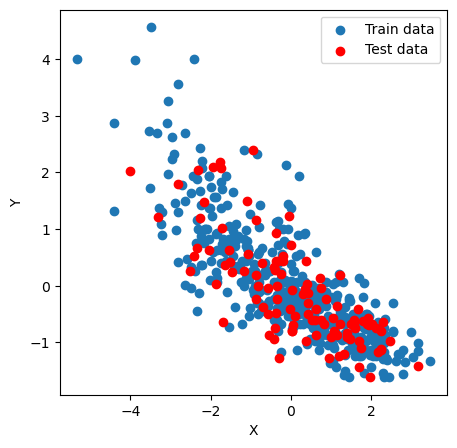

In [169]:
plt.figure(figsize=(5,5))
plt.scatter(x_train,y_train,label='Train data')
plt.scatter(x_test,y_test,color="red",label='Test data')
# plt.scatter(transformed_data[:,0],target,color='green')
plt.legend()
plt.xlabel("X")
plt.ylabel('Y')
plt.show()

In [163]:
def loss(y,y_pred):
    return ((y-y_pred)**2).mean()


def gradient_descent(x,y,m,c,learning_rate):
    N=len(y)
    y_pred=m*x+c
    dm=-(2/N)*sum(x*(y-y_pred))
    dc=-(2/N)*sum(y-y_pred)
    m=m-learning_rate*dm
    c=c-learning_rate*dc
    return m,c

In [164]:
#Training model
m=0
c=0
iteration=10000
learning_rate=0.0001
loss_list=[]
for i in range(iteration):
    y_pred=m*x_train+c
    loss_list.append(loss(y_train,y_pred));
    m,c=gradient_descent(x_train,y_train,m,c,learning_rate)

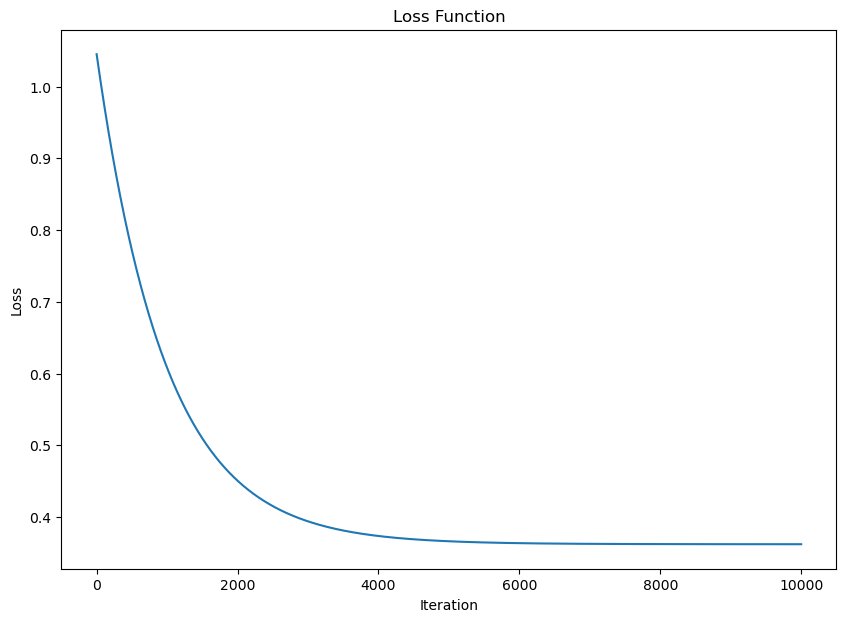

In [165]:
# ploting loss fxn
plt.figure(figsize=(10,7))
plt.plot(range(iteration),loss_list)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Function")
plt.show()

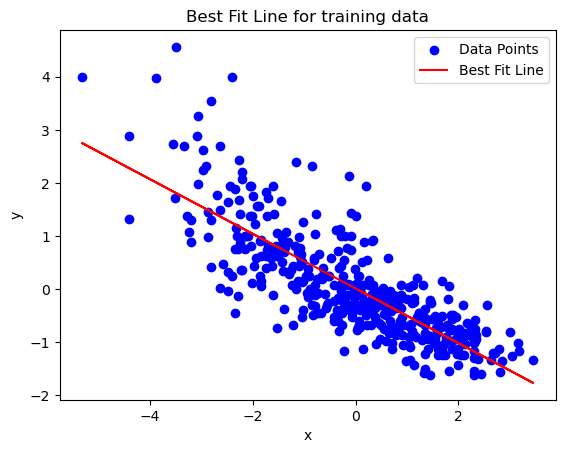

In [166]:
#Plotting best fit line on training data
plt.scatter(x_train, y_train, color='blue', label='Data Points')
plt.plot(x_train, m * x_train + c, color='red', label='Best Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Line for training data')
plt.legend()
plt.show()


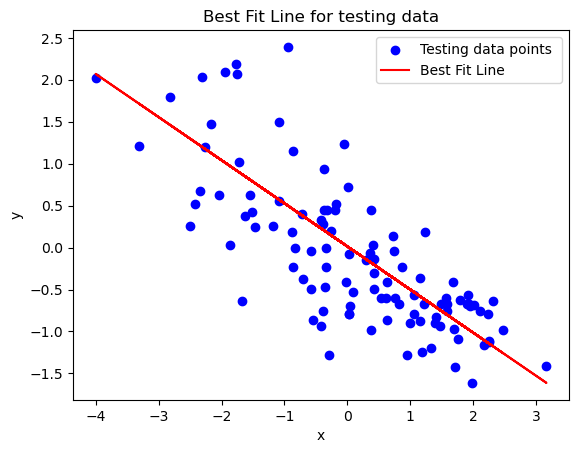

In [167]:
#Plotting best fit line on testing data
plt.scatter(x_test, y_test, color='blue', label='Testing data points ')
# plt.scatter(x_train, y_train, color='green', label='Training data points',alpha=0.5)
plt.plot(x_test, m * x_test + c, color='red', label='Best Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Line for testing data')
plt.legend()
plt.show()
